# Importing Libraries and Data

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

In [37]:
X_train = pd.read_csv("../data/X_train.csv")
Y_train = pd.read_csv("../data/Y_train.csv")
feature_names = X_train.columns
X_train = np.asarray(X_train)
Y_train = np.ravel(np.asarray(Y_train))

y_test = pd.read_csv("../data/y_test.csv")
X_test = pd.read_csv("../data/X_test.csv")

# Logistic Regression

In [38]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [39]:
# Looking at the metrics

In [40]:
def evaluate_classification_method(mod):
    y_pred = mod.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average="weighted")
    labels = ["Dropout", "Enrolled", "Graduate"]
    full_report = classification_report(y_test, y_pred, target_names=labels)

    print(f"Accuracy classification score: {accuracy}")
    print(f"F1 score: {f1}")
    print(full_report)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    return accuracy, f1, full_report, cm

Accuracy classification score: 0.7819209039548023
F1 score: 0.8024811196164413
              precision    recall  f1-score   support

     Dropout       0.81      0.76      0.79       284
    Enrolled       0.58      0.30      0.39       151
    Graduate       0.80      0.96      0.87       450

    accuracy                           0.78       885
   macro avg       0.73      0.67      0.68       885
weighted avg       0.76      0.78      0.76       885



/Users/joshuakoh/main_python_ve/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


(0.7819209039548023,
 0.8024811196164413,
 '              precision    recall  f1-score   support\n\n     Dropout       0.81      0.76      0.79       284\n    Enrolled       0.58      0.30      0.39       151\n    Graduate       0.80      0.96      0.87       450\n\n    accuracy                           0.78       885\n   macro avg       0.73      0.67      0.68       885\nweighted avg       0.76      0.78      0.76       885\n',
 array([[217,  22,  45],
        [ 41,  45,  65],
        [ 10,  10, 430]]))

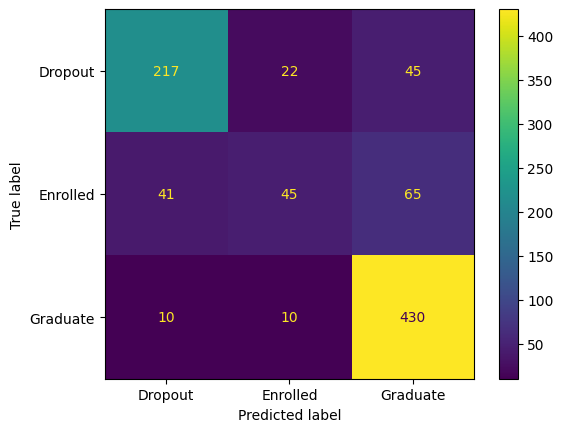

In [41]:

dummy = evaluate_classification_method(LR)